<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/5_Functional_API_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(train_labels)
print(test_labels)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from keras import layers
inputs = layers.Input(shape=(28,28,1))

conv1 = layers.Conv2D(32, kernel_size=(3,3),activation='relu')(inputs)
conv2 = layers.Conv2D(32, kernel_size=(3,3),activation='relu')(conv1)
pool = layers.MaxPooling2D(pool_size=(2))(conv2)
flat = layers.Flatten()(pool)
dense1 = layers.Dense(128, activation='relu')(flat)
drop = layers.Dropout(0.25)(dense1)

outputs = layers.Dense(10, activation='softmax')(drop)

In [ ]:
from keras.models import Model

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 101s 212ms/step - acc: 0.8515 - loss: 0.4542 - val_acc: 0.9829 - val_loss: 0.0521
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 199ms/step - acc: 0.9809 - loss: 0.0622 - val_acc: 0.9877 - val_loss: 0.0374
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - acc: 0.9869 - loss: 0.0402 - val_acc: 0.9899 - val_loss: 0.0305
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 203ms/step - acc: 0.9917 - loss: 0.0285 - val_acc: 0.9897 - val_loss: 0.0315
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - acc: 0.9928 - loss: 0.0245 - val_acc: 0.9906 - val_loss: 0.0313


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9875 - loss: 0.0416
test_acc: 0.9905999898910522


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.9354666471481323, 0.9820333123207092, 0.9872499704360962, 0.9910500049591064, 0.9925333261489868]


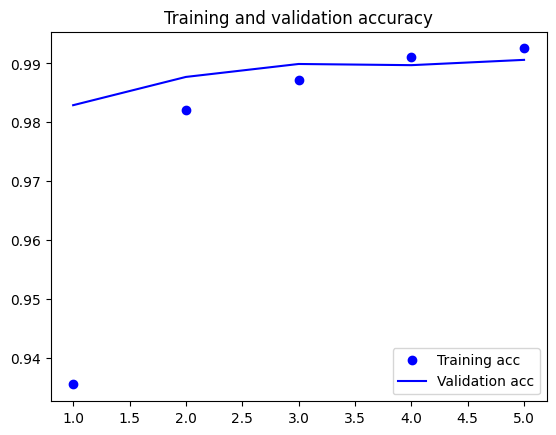

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend();

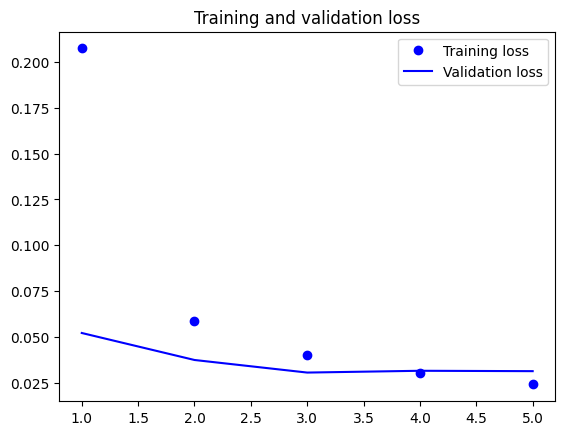

In [ ]:
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();
